# Part 2 (a)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel(r'/Users/judyx2/Documents/Yale/595 Quant fin/Problem Set/PS 1/Problem_Set1.xlsx',skiprows=4,header=1)
df= df.drop(["Unnamed: 51","Unnamed: 53","Unnamed: 54","Unnamed: 55", "Unnamed: 56", "Unnamed: 57", "Unnamed: 58"], axis=1)
#df.head()

In [55]:
def all_volatility(x):
    all_vol=[]
    for i in range(2,181):
        all_vol.append(np.sqrt(df.iloc[:i,x].var()))
    all_vol=np.array(all_vol)
    return all_vol

#np.sqrt(df.iloc[:2,3].var())
#df.iloc[:2,51]

In [56]:
def ltm_volatility(x):
     ltm_vol=[]
     for i in range(13,181):
         ltm_vol.append(np.sqrt(df.iloc[i-13:i,x].var()))
     ltm_vol=np.array(ltm_vol)
     return ltm_vol
    
#np.sqrt(df.iloc[13-13:13,3].var())
#df.iloc[0:13,3]
#df.iloc[1:14,3]
#df.iloc[180-13:180,3]

In [57]:
all_vol_CSCO = all_volatility(3)[11:]
#all_vol_CSCO.size
#all_vol_CSCO
ltm_vol_CSCO = ltm_volatility(3)
#ltm_vol_CSCO.size
#print(ltm_vol_CSCO)
all_vol_mkt = all_volatility(51)[11:]
#all_vol_CSCO.size
ltm_vol_mkt = ltm_volatility(51)
#ltm_vol_CSCO.size

date = df.date.to_numpy()[12:]
#date.size

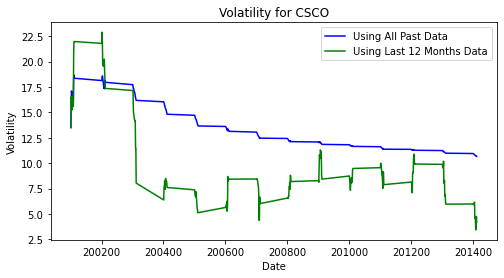

In [58]:
plt.figure(figsize=(8,4))
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility for CSCO')
plt.plot(date,all_vol_CSCO, color='blue',label='Using All Past Data')
plt.plot(date,ltm_vol_CSCO, color='green',label='Using Last 12 Months Data')
plt.legend()
plt.show()

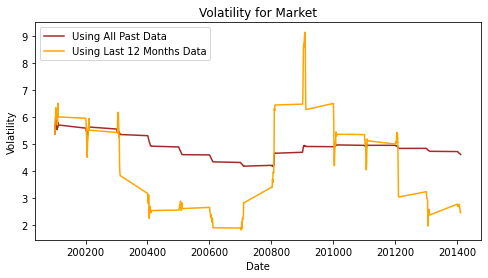

In [59]:
plt.figure(figsize=(8,4))
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility for Market')
plt.plot(date,all_vol_mkt, color='brown',label='Using All Past Data')
plt.plot(date,ltm_vol_mkt, color='orange',label='Using Last 12 Months Data')
plt.legend()
plt.show()

# Part 2 (b)

In [60]:
import statsmodels.api as sm

In [61]:
def all_beta_confint(x):
    all_beta=[]
    all_beta_ci=[]
    stock=[]
    for i in range(3,181):
        stock=df.iloc[:i,x].to_numpy()
        mkt=df.iloc[:i,51].to_numpy()
        ols = sm.OLS(mkt,stock).fit()
        all_beta.append(float(ols.params))
        all_beta_ci.append(ols.conf_int(alpha=0.05, cols=None))
    return all_beta_ci,all_beta

In [62]:
all_beta_ci , all_beta= all_beta_confint(3)
all_beta_ci = pd.DataFrame(np.concatenate(all_beta_ci))

In [63]:
def ltm_beta_confint(x):
    ltm_beta=[]
    ltm_beta_ci=[]
    stock=[]
    for i in range(13,181):
        stock=df.iloc[i-13:i,x].to_numpy()
        mkt=df.iloc[i-13:i,51].to_numpy()
        ols = sm.OLS(mkt,stock).fit()
        ltm_beta.append(float(ols.params))
        ltm_beta_ci.append(ols.conf_int(alpha=0.05, cols=None))
    return ltm_beta_ci,ltm_beta

In [64]:
ltm_beta_ci , ltm_beta= ltm_beta_confint(3)
ltm_beta_ci = pd.DataFrame(np.concatenate(ltm_beta_ci))

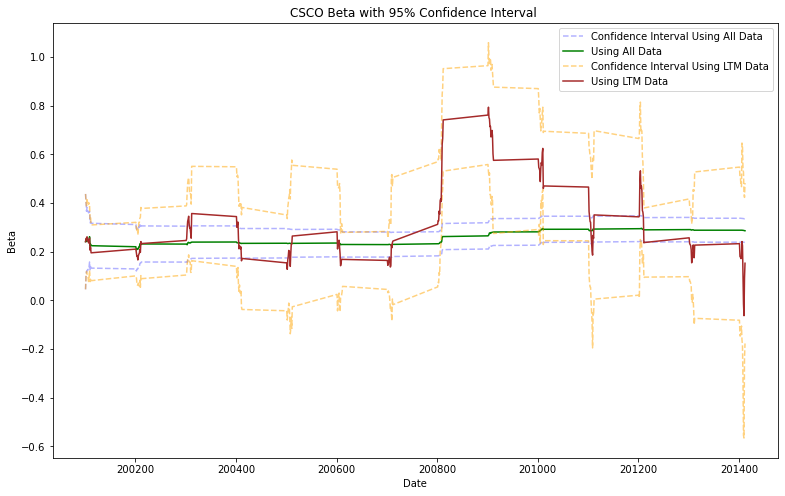

In [65]:
date = df.date.to_numpy()[12:]
all_low=all_beta_ci.iloc[10:,0]
all_high=all_beta_ci.iloc[10:,1]

plt.figure(figsize=(13,8))
plt.xlabel('Date')
plt.ylabel('Beta')
plt.title('CSCO Beta with 95% Confidence Interval ')

plt.plot(date,all_low,color='blue',alpha=0.3,linestyle='dashed',label='Confidence Interval Using All Data')
plt.plot(date,all_high,color='blue',alpha=0.3,linestyle='dashed')
plt.plot(date,all_beta[10:],color='green',label='Using All Data')

plt.plot(date,ltm_beta_ci[0],color='orange',alpha=0.5,linestyle='dashed',label='Confidence Interval Using LTM Data')
plt.plot(date,ltm_beta_ci[1],color='orange',alpha=0.5,linestyle='dashed')
plt.plot(date,ltm_beta,color='brown',label='Using LTM Data')

plt.legend()